In [1]:
import numpy as np
import pandas as pd
cred=pd.read_csv('C://Users//Pratik//Desktop/1613441452_005314_1600106342_882043_train.csv',sep=',')
test_data=pd.read_csv('C://Users//Pratik//Desktop/1613441452_0172963_1600106342_8864183_test.csv',sep=',')
cred=cred.drop(columns=['id']).drop_duplicates(keep='first',inplace=False)
X_test=test_data.drop(columns=['id'])

In [2]:
'''from category_encoders import OrdinalEncoder
encoder=OrdinalEncoder(cols=['F10','F11'])
cred=encoder.fit_transform(cred)
test_data=encoder.fit_transform(test_data)'''

C:\Users\Pratik\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


<AxesSubplot:>

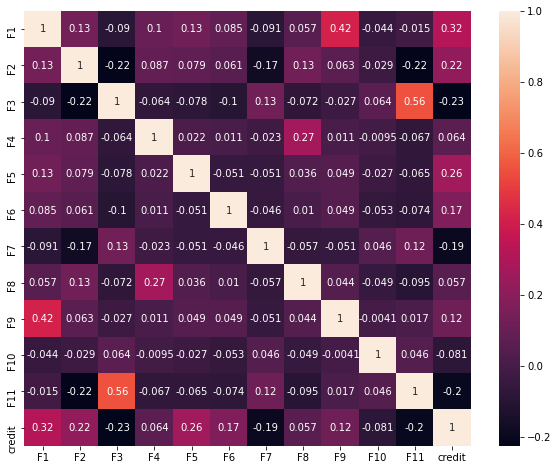

In [11]:
'''import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(10,8))
corr = cred.corr()
sb.heatmap(corr,annot=True)'''

In [3]:
y_train=cred['credit']
X_train=cred.drop(columns=['credit'])

In [4]:
#Train Test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_tr,X_ts,y_tr,y_ts=train_test_split(X_train,y_train,test_size=0.2,shuffle=True)

In [ ]:
'''from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
y_pred=lreg.fit(X_tr,y_tr).predict(X_ts)
print(f1_score(y_ts,y_pred))'''

In [ ]:
'''from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
y_pred=knn.fit(X_tr,y_tr).predict(X_ts)
print(f1_score(y_ts,y_pred))'''

In [ ]:
'''from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
y_pred=nb.fit(X_tr,y_tr).predict(X_ts)
print(f1_score(y_ts,y_pred))'''

In [ ]:
'''from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassfier(max_depth=30)
y_pred=dt.fit(X_tr,y_tr).predict(X_ts)
print(f1_score(y_ts,y_pred))'''

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
rf=RandomFOrestClassfier(n_estimators=500)
y_pred=rf.fit(X_tr,y_tr).predict(X_ts)
print(f1_score(y_ts,y_pred))'''

In [15]:
from xgboost import XGBClassifier
model=XGBClassifier(use_label_encoder=False)
y_pred=model.fit(X_tr,y_tr).predict(X_ts)
print(f1_score(y_ts,y_pred))

[10:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8795698924731182


In [3]:
'''Encoding as single unit(3) for all except black(1) & white(2)'''
X_train=pd.get_dummies(X_train,columns=['F10'])
X_train['F10']=(X_train['F10_ Black'])+(X_train['F10_ White']*2)+((X_train['F10_ Amer-Indian-Eskimo']+X_train['F10_ Asian-Pac-Islander']+X_train['F10_ Other'])*3)
X_train=X_train.drop(columns=['F10_ Black','F10_ White','F10_ Amer-Indian-Eskimo','F10_ Asian-Pac-Islander','F10_ Other'])
X_test=pd.get_dummies(X_test,columns=['F10'])
X_test['F10']=(X_test['F10_ Black'])+(X_test['F10_ White']*2)+((X_test['F10_ Amer-Indian-Eskimo']+X_test['F10_ Asian-Pac-Islander']+X_test['F10_ Other'])*3)
X_test=X_test.drop(columns=['F10_ Black','F10_ White','F10_ Amer-Indian-Eskimo','F10_ Asian-Pac-Islander','F10_ Other'])

In [4]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['F11'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)

C:\Users\Pratik\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
'''Oversampling'''
'''from sklearn.utils import resample
X = pd.concat([X_tr, y_tr], axis=1)
high = X[X.credit==0]
low = X[X.credit==1]
upsampled = resample(low,replace=True,n_samples=len(high))
final = pd.concat([high,upsampled])
y_tr = final.credit
X_tr = final.drop('credit', axis=1)
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False)
y_pred = model.fit(X_tr, y_tr).predict(X_ts)

from sklearn.metrics import f1_score
f1_score(y_ts,y_pred)'''

In [13]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
X_train,y_train=os.fit_resample(X_train,y_train)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train.iloc[:,0:2]=sc.fit_transform(X_train.iloc[:,0:2])
X_train.iloc[:,4:6]=sc.fit_transform(X_train.iloc[:,4:6])

F1 : 0.07977666
F2 : 0.026006663
F3 : 0.28777212
F4 : 0.027423419
F5 : 0.19176506
F6 : 0.0770077
F7 : 0.15023604
F8 : 0.028866503
F9 : 0.016995337
F10 : 0.04835115
F11 : 0.065799385


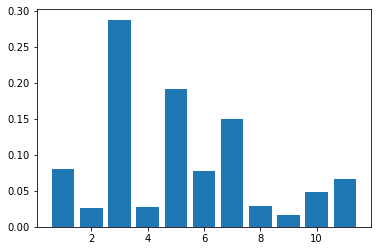

In [16]:
'''importance = model.feature_importances_
for i,v in enumerate(importance):
 print('F'+str(i+1),':',v)
plt.bar([x for x in range(1,len(importance)+1)],importance)
plt.show()'''

In [6]:
from xgboost import XGBClassifier
model=XGBClassifier(use_label_encoder=False,scale_pos_weight=0.75)
y_pred=model.fit(X_train,y_train).predict(X_test)

[10:40:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [7]:
pd.DataFrame(y_pred).to_csv(path_or_buf='C:\\Users\\Pratik\\Desktop\\submission.txt',header=False,index=False,index_label=None,mode='w')